### Clustering

1)	Clustering identifies similarities between objects, which it groups according to those characteristics in common and which differentiate them from other groups of objects. These groups are known as "clusters".<br>
2)	Clustering is framed in unsupervised learning; that is, for this type of algorithm we only have one set of input data (not labeled), about which we must obtain information, without previously knowing what the output will be.<br>


<b>3)	There is no need to split the data in training and testing dataset.</b>


### Kmeans

1)	K-means algorithm is an iterative algorithm that tries to partition the dataset into <b>K pre-defined distinct non-overlapping subgroups (clusters)</b> where each data point belongs to only one group<br>
2)	It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that <b>the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum</b>. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.<br>
3)	Since clustering algorithms including KMeans which use distance-based measurements to determine the similarity between data points, it’s recommended to standardize or scale the data since almost always the features in any dataset would have different units of measurements for instance as age vs. income.<br>


### K-Means Algorithm

1) Specify number of clusters K.<br>
2) Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.<br>
3) Keep iterating until there is no change to the centroids. i.e. assignment of data points to clusters isn’t changing.<br>
4) Compute the sum of the squared distance between data points and all centroids.<br>
5) Assign each data point to the closest cluster (centroid).<br>
6) Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.


<img src="kmeans1.png">

### Elbow Method to find the optimal number of clusters

Elbow method gives us an idea on what a good k number of clusters would be based on the within cluster sum of square (WCSS) between data points and their assigned clusters’ centroids. We pick k at the spot where WCSS starts to flatten out and forming an elbow.


#### Pros
1)	Simple to implement and understand.<br>
2)	It gives best results, when data sets are distinct

#### Cons
1)	The user has to specify K(number of clusters in the beginning)<br>
2)	Data is required to be scaling the data in most cases.<br>
3)	Centroids can be dragged by the outliers. <br>
4)	As the number of dimensions (number of columns/features) increases, it is recommended to us PCA to reduce dimensions.


#### Elbow Method -
1) Used to determine the optimal value of K<br>
2) The point at which elbow is formed, is the optimal value of K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['CID','Gender','Age','AnnualIncome','SpendingScore']
df.head()

,CID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CID              0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [6]:
df.duplicated().sum()

0

#### Problem Statement - Cluster the data into different groups based on AnnualIncome and SpendingScore

In [11]:
x = df.iloc[:,3:].values
# x.head()
print(x[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [10]:
print(type(x))

<class 'numpy.ndarray'>


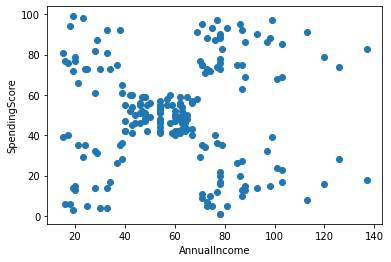

In [13]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

In [17]:
from sklearn.cluster import KMeans

WCSS
 [269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30273.394312070028, 25018.576334776328, 21862.09267218289, 19787.67055496685, 17511.7418692661, 15970.937387150669, 14445.596243042673, 12804.192235022456, 11668.474544315332, 10894.701728156897, 10112.354674492173, 9472.940618205328]


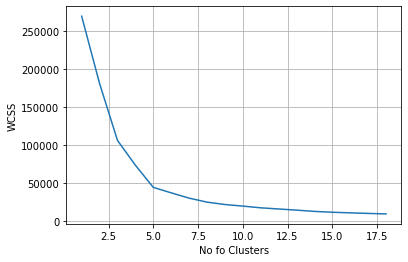

In [20]:
# wcss = within cluster sum of squares
# model.inertia_ = Sum of squared distance between each and very individual data point and its closest
# cluster center
wcss = []
for i in range(1,19):
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)
    
print('WCSS\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.xlabel('No fo Clusters')
plt.ylabel("WCSS")
plt.grid()
plt.show()

#### Optimal Number of Clusters = 5

### Applying KMeans at K=5

In [21]:
k5 = KMeans(n_clusters=5)
k5.fit(x)

KMeans(n_clusters=5)

In [22]:
ypred5 = k5.predict(x)
print(ypred5)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [23]:
cent5 = k5.cluster_centers_
print(cent5)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


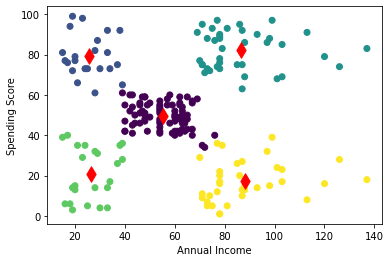

In [28]:
plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='d',s=120)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Applying KMeans at K=3

In [29]:
k3 = KMeans(3)
k3.fit(x)

KMeans(n_clusters=3)

In [30]:
ypred3 = k3.predict(x)
print(ypred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [31]:
cent3 = k3.cluster_centers_
print(cent3)

[[44.15447154 49.82926829]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


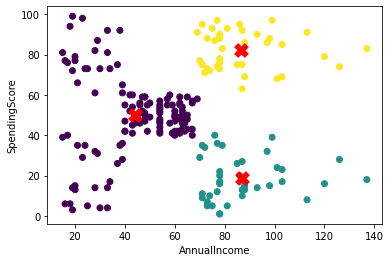

In [35]:
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',s=180,marker='X')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

In [41]:
res = pd.DataFrame(x,columns=['AIncome','SScore'])
res['Clusters5'] = ypred5
res['Clusters3'] = ypred3
res.head()

,AIncome,SScore,Clusters5,Clusters3
0,15,39,3,0
1,15,81,1,0
2,16,6,3,0
3,16,77,1,0
4,17,40,3,0


In [42]:
res['Clusters5'].value_counts()

0    81
2    39
4    35
3    23
1    22
Name: Clusters5, dtype: int64

In [43]:
res['Clusters3'].value_counts()

0    123
2     39
1     38
Name: Clusters3, dtype: int64

### Applying Classifictaion after Clustering

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
res.head()

,AIncome,SScore,Clusters5,Clusters3
0,15,39,3,0
1,15,81,1,0
2,16,6,3,0
3,16,77,1,0
4,17,40,3,0


In [47]:
x1 = res.iloc[:,:2]
y1 = res.iloc[:,2]
x1.head(2)

,AIncome,SScore
0,15,39
1,15,81


In [48]:
y1.head()

0    3
1    1
2    3
3    1
4    3
Name: Clusters5, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25)

In [52]:
m2 = LogisticRegression(max_iter=1000)
m2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 1.0
Testing Score 0.98


In [57]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[4 4 0 0 0 4 1 2 0 0 4 4 0 0 0 0 0 2 3 0 1 2 0 4 2 2 1 1 0 3 0 3 0 2 3 0 0
 1 4 2 2 3 0 1 2 4 4 0 3 0]


In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [59]:
def gen_metrics(y_test,ypred):
    print('Accuracy Score',accuracy_score(y_test,ypred))
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))


In [60]:
print('Log Reg Metrics')
gen_metrics(y_test,ypred_m2)

Log Reg Metrics
Accuracy Score 0.98
[[19  0  0  0  0]
 [ 1  6  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



### KNN Classification

In [68]:
m3  = KNeighborsClassifier(n_neighbors=17)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [69]:
print('Training Score',m3.score(x_train,y_train))
print('Testing Score',m3.score(x_test,y_test))

Training Score 0.9733333333333334
Testing Score 0.96


In [70]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[4 4 0 0 0 4 1 2 0 0 4 4 0 0 0 0 0 2 0 0 1 2 0 4 2 2 1 1 0 3 0 3 0 2 3 0 0
 1 4 2 2 3 0 1 2 4 4 0 3 0]


In [71]:
print('KNN Metrics')
gen_metrics(y_test,ypred_m3)

KNN Metrics
Accuracy Score 0.96
[[19  0  0  0  0]
 [ 1  6  0  0  0]
 [ 0  0  9  0  0]
 [ 1  0  0  5  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         9
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         9

    accuracy                           0.96        50
   macro avg       0.98      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50



### SVM Classifier

In [72]:
from sklearn.svm import SVC

In [83]:
m4 = SVC(kernel='rbf',C=0.1)
m4.fit(x_train,y_train)

SVC(C=0.1)

In [84]:
print('Training Score',m4.score(x_train,y_train))
print('Testing Score',m4.score(x_test,y_test))

Training Score 0.9666666666666667
Testing Score 0.96


In [85]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[4 4 0 0 0 4 1 2 0 0 4 4 0 0 0 0 0 2 0 0 1 2 0 4 2 2 1 1 0 3 0 3 0 2 3 0 0
 1 4 2 2 3 0 1 2 4 4 0 3 0]


In [86]:
print('SVC Metrics')
gen_metrics(y_test,ypred_m4)

SVC Metrics
Accuracy Score 0.96
[[19  0  0  0  0]
 [ 1  6  0  0  0]
 [ 0  0  9  0  0]
 [ 1  0  0  5  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         9
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         9

    accuracy                           0.96        50
   macro avg       0.98      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50

